In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns



In [13]:
car_df = pd.read_csv('/aiffel/data/cars.csv')
brand_df = pd.read_csv('/aiffel/data/brand.csv')
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [14]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [37]:
brand_df['title'] = brand_df['title'].replace({'skoda': 'SKODA FABIA',
    'vauxhall': 'VAUXHALL CORSA',
    'hyundai': 'HYUNDAI I30',
    'mini': 'MINI HATCH'
})

In [40]:
print(brand_df.head())

            title         country
0     SKODA FABIA  Czech Republic
1  VAUXHALL CORSA  United Kingdom
2     HYUNDAI I30     South Korea
3      MINI HATCH  United Kingdom
4            ford   United States


In [41]:
print(car_df.columns)
print(brand_df.columns)

Index(['title', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Engine', 'Gearbox',
       'Doors', 'Seats', 'Emission Class', 'Service history'],
      dtype='object')
Index(['title', 'country'], dtype='object')


In [42]:
merge_df = car_df.merge(brand_df, on = 'title', how = 'left')

In [44]:
print(merge_df.head())

            title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     SKODA FABIA   6900           70189               2016              3.0   
1  VAUXHALL CORSA   1495           88585               2008              4.0   
2     HYUNDAI I30    949          137000               2011              NaN   
3      MINI HATCH   2395           96731               2010              5.0   
4  VAUXHALL CORSA   1000           85000               2013              NaN   

  Fuel type  Body type Engine Gearbox  Doors  Seats Emission Class  \
0    Diesel  Hatchback   1.4L  Manual    5.0    5.0         Euro 6   
1    Petrol  Hatchback   1.2L  Manual    3.0    5.0         Euro 4   
2    Petrol  Hatchback   1.4L  Manual    5.0    5.0         Euro 5   
3    Petrol  Hatchback   1.4L  Manual    3.0    4.0         Euro 4   
4    Diesel  Hatchback   1.3L  Manual    5.0    5.0         Euro 5   

  Service history         country  
0             NaN  Czech Republic  
1            Full  United 

In [48]:
#카테고리형 변수를 숫자 형태로 변환한다. 
from sklearn.preprocessing import LabelEncoder
# 카테고리형 변수 추출
categorical_columns = merge_df.select_dtypes(include=['object', 'category']).columns.tolist()


In [49]:
for col in categorical_columns:
    print(f"{col} : {merge_df[col].unique()}")

title : ['SKODA FABIA' 'VAUXHALL CORSA' 'HYUNDAI I30' 'MINI HATCH' 'HYUNDAI COUPE'
 'FORD FOCUS' 'VOLVO 740' 'PEUGEOT 207' 'FORD FIESTA' 'VAUXHALL INSIGNIA'
 'BMW 3 SERIES' 'CITROEN C1' 'CITROEN C4' 'VAUXHALL ASTRA' 'FORD MONDEO'
 'MERCEDES-BENZ A180' 'PEUGEOT 407' 'FORD KA' 'MERCEDES-BENZ A CLASS'
 'MAZDA MAZDA2' 'SAAB 9-3' 'VOLKSWAGEN POLO' 'BMW 1 SERIES' 'HONDA ACCORD'
 'VOLKSWAGEN BEETLE' 'MG MG6' 'FORD C-MAX' 'HONDA CIVIC' 'TOYOTA AURIS'
 'VOLVO S40' 'SEAT IBIZA' 'PEUGEOT 308' 'VAUXHALL MERIVA'
 'MERCEDES-BENZ B CLASS' 'MAZDA MAZDA3' 'NISSAN 350 Z' 'ALFA ROMEO MITO'
 'RENAULT FLUENCE' 'VOLKSWAGEN PASSAT' 'KIA SPORTAGE' 'CITROEN XM'
 'VAUXHALL ANTARA' 'NISSAN NOTE' 'BMW 5 SERIES' 'HONDA CR-V'
 'PROTON SAVVY' 'NISSAN MICRA' 'FIAT PANDA' 'RENAULT MEGANE'
 'RENAULT CLIO' 'HYUNDAI I20' 'CITROEN C3' 'AUDI A6 SALOON' 'TOYOTA YARIS'
 'FIAT 500' 'MERCEDES-BENZ M CLASS' 'AUDI A4' 'PEUGEOT 308 SW'
 'FORD S-MAX' 'PEUGEOT 1007' 'HONDA ODYSSEY' 'PEUGEOT 307 CC' 'HONDA JAZZ'
 'MERCEDES-BENZ CLK'

In [75]:
#service_history NaN => unknown value
isnull_df = merge_df.isnull()
missing_sum = isnull_df.sum()
missing_filtered = missing_sum[missing_sum > 0]
print(missing_filtered)


Previous Owners    1411
Engine               45
Doors                25
Seats                35
Emission Class       87
Service history    3147
country            3325
dtype: int64


In [76]:
#결측치를 각 컬럼의 특성에 맞춰서 처리해본다. 
# service history _ NaN -> Unknown
merge_df['Service history'] = merge_df['Service history'].fillna('unknown')
print(merge_df['Service history'].isnull().sum())


0


In [80]:
#missing_filtered에 결측치를 제거한 service history컬럼을 업데이트해줘야한다 
missing_filtered = merge_df.isnull().sum()
missing_filtered = missing_filtered[missing_filtered > 0]
print(missing_filtered)

Previous Owners    1411
Engine               45
Doors                25
Seats                35
Emission Class       87
country            3325
dtype: int64


In [110]:
#결측치 제거 이후에 
# 결측치가 1000개 이상인 데이터를 지운다. 
columns_to_drop = missing_filtered[missing_filtered >= 1000].index.tolist()

In [ ]:
#국가별 총 브랜드 수는?
# 결측치 1000 이상인 데이터 삭제중에 컨트리를 제외하자. 

In [111]:
columns_to_drop = [col for col in columns_to_drop if col != 'country']

In [112]:
cleaned_df = merge_df.drop(columns = columns_to_drop)

In [113]:
print(columns_to_drop)

['Previous Owners']


In [117]:
cleaned_df[cleaned_df['country'].notnull()]

,title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,unknown,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,United Kingdom
2,HYUNDAI I30,949,137000,2011,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,unknown,South Korea
3,MINI HATCH,2395,96731,2010,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,unknown,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,MINI HATCH,11999,33156,2018,Petrol,Hatchback,1.5L,Manual,5.0,5.0,Euro 6,Full,United Kingdom
3653,VAUXHALL CORSA,1850,88000,2009,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,unknown,United Kingdom
3656,VAUXHALL CORSA,1995,126000,2013,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,unknown,United Kingdom
3662,MINI HATCH,11999,33156,2018,Petrol,Hatchback,1.5L,Manual,5.0,5.0,Euro 6,Full,United Kingdom


In [116]:
# country_brand_sum()구하기 
brand_by_country = cleaned_df.groupby('country')['title'].count().sort_values(ascending=False)


In [83]:
#Scaler활용하기 : 모델이 여러 특성(features_)을 사용할 때, 값이 크기가 너무 다르면 특정 특성이 더 큰 영향력을 갖는다. 학습을 왜곡시키고 성능을 저조하게 함. 
from sklearn.preprocessing import StandardScaler 


In [84]:
# one-Hot Encoding 범주형 변수를 0과 1ㅡ의 조합으로 바꾸는 방식이다. 
# 가장 효과적인 특정 컬럼만 축출해서 생성해보자. 
# 범주 간 순서가 없음.범주의 개수가 너무 많지 않음. 머신러닝 모델이 선형 회귀나 로지스틱 회귀일 경우 / 숫자간 간격을 의미로 받아들이기 때문에 원스팟이 필수이다. 

In [85]:
# Emission Class로 해본다. 
# 범주 수가 많으면 Label Encoding 고려할 수 있다. Gearbox 두가지 명확하여 이게 더 나아보인다. 

In [86]:
encode_targets = ['Gearbox', 'Emission Class']
encode_df = pd.get_dummies(merge_df, columns=encode_targets)

In [87]:
for col in encode_df.columns:
    if 'Gearbox' in col or 'Emission Class' in col:
        print(col)
    

Gearbox_Automatic
Gearbox_Manual
Emission Class_Euro 1
Emission Class_Euro 2
Emission Class_Euro 3
Emission Class_Euro 4
Emission Class_Euro 5
Emission Class_Euro 6


In [88]:
encode_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Doors,Seats,Service history,country,Gearbox_Automatic,Gearbox_Manual,Emission Class_Euro 1,Emission Class_Euro 2,Emission Class_Euro 3,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,5.0,5.0,unknown,Czech Republic,0,1,0,0,0,0,0,1
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,3.0,5.0,Full,United Kingdom,0,1,0,0,0,1,0,0
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,5.0,5.0,unknown,South Korea,0,1,0,0,0,0,1,0
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,3.0,4.0,Full,United Kingdom,0,1,0,0,0,1,0,0
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,5.0,5.0,unknown,United Kingdom,0,1,0,0,0,0,1,0


In [89]:
print(encode_df[encode_df['Gearbox_Manual'] == 1].shape)

(2870, 20)


In [90]:
print([col for col in encode_df.columns if 'Emission Class' in col or 'Gearbox_Manual' in col])

['Gearbox_Manual', 'Emission Class_Euro 1', 'Emission Class_Euro 2', 'Emission Class_Euro 3', 'Emission Class_Euro 4', 'Emission Class_Euro 5', 'Emission Class_Euro 6']


In [91]:
#one top encoding이후 절차 
# EDA 분석 
# 통계요약 , 결측치 확인, 범주의 시각화, PCA등 

In [92]:
encode_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats,Gearbox_Automatic,Gearbox_Manual,Emission Class_Euro 1,Emission Class_Euro 2,Emission Class_Euro 3,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329,0.221589,0.778411,0.001085,0.006781,0.037158,0.289666,0.340928,0.300787
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046,0.415373,0.415373,0.032924,0.082076,0.189173,0.453669,0.474085,0.458662
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
# 수치형의 컬럼을 축출하고 결측치를 제거한다 
numeric_df = encode_df.select_dtypes(include=['number'])
clean_numeric_df = numeric_df.dropna(axis = 1)
clean_numeric_df.describe()

,Price,Mileage(miles),Registration_Year,Gearbox_Automatic,Gearbox_Manual,Emission Class_Euro 1,Emission Class_Euro 2,Emission Class_Euro 3,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6
count,3687.000000,3.687000e+03,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000
mean,5787.301058,8.132854e+04,2011.846216,0.221589,0.778411,0.001085,0.006781,0.037158,0.289666,0.340928,0.300787
std,4480.629885,3.941718e+04,5.082387,0.415373,0.415373,0.032924,0.082076,0.189173,0.453669,0.474085,0.458662
min,400.000000,1.000000e+00,1953.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2490.000000,5.698400e+04,2008.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4000.000000,8.000000e+04,2012.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7995.000000,1.030000e+05,2015.500000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,33900.000000,1.110100e+06,2025.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clean_numeric_df)
scaled_df = pd.DataFrame(scaled_data, columns=clean_numeric_df.columns)

In [100]:
scaled_df.head()

,Price,Mileage(miles),Registration_Year,Gearbox_Automatic,Gearbox_Manual,Emission Class_Euro 1,Emission Class_Euro 2,Emission Class_Euro 3,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6
0,0.248369,-0.282644,0.817401,-0.533544,0.533544,-0.032956,-0.082625,-0.196447,-0.638584,-0.719225,1.524669
1,-0.958098,0.184119,-0.756876,-0.533544,0.533544,-0.032956,-0.082625,-0.196447,1.565965,-0.719225,-0.655880
2,-1.079973,1.412557,-0.166522,-0.533544,0.533544,-0.032956,-0.082625,-0.196447,-0.638584,1.390386,-0.655880
3,-0.757206,0.390808,-0.363307,-0.533544,0.533544,-0.032956,-0.082625,-0.196447,1.565965,-0.719225,-0.655880
4,-1.068589,0.093156,0.227047,-0.533544,0.533544,-0.032956,-0.082625,-0.196447,-0.638584,1.390386,-0.655880


In [102]:
#PCA principle component analysis: 데이터 분석과 머신러닝에서 매우 자주 사용. 
#차원의 축소 기법 
#공분산행렬 : 두 변수 간의 변동관계 


In [105]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 


In [124]:
pca = PCA(n_components=0.70)
# pca 객체 생성과 주 성분을 70프로 이상 포함하는 식
pca_result = pca.fit_transform(scaled_df)
# pca learn and transform 
print("selcec components number: ", pca.n_components_)
print(pca_result)

selcec components number:  4
[[-1.69204351 -0.6584498  -0.64850097  0.32846084]
 [ 1.665559   -0.71744215 -1.37369149 -0.54002619]
 [ 1.27628423 -1.06487475  1.66697821 -0.10944175]
 ...
 [ 0.75763751 -0.97350478  1.70333413 -0.16728183]
 [ 2.56954885 -0.5433041  -1.09413328 -0.5759563 ]
 [ 0.48145924 -1.15159651  1.52553836 -0.13014047]]


In [119]:

# 상관관계가 높은 변수들이 있는지 확인해본다. 
# dr.corr() 수치형 변수 간의 상관관계
# sns.heatmap() visualization 
# np.where() + .abs() 특정 임계치 이상인 변수 쌍을 찾아냄. 


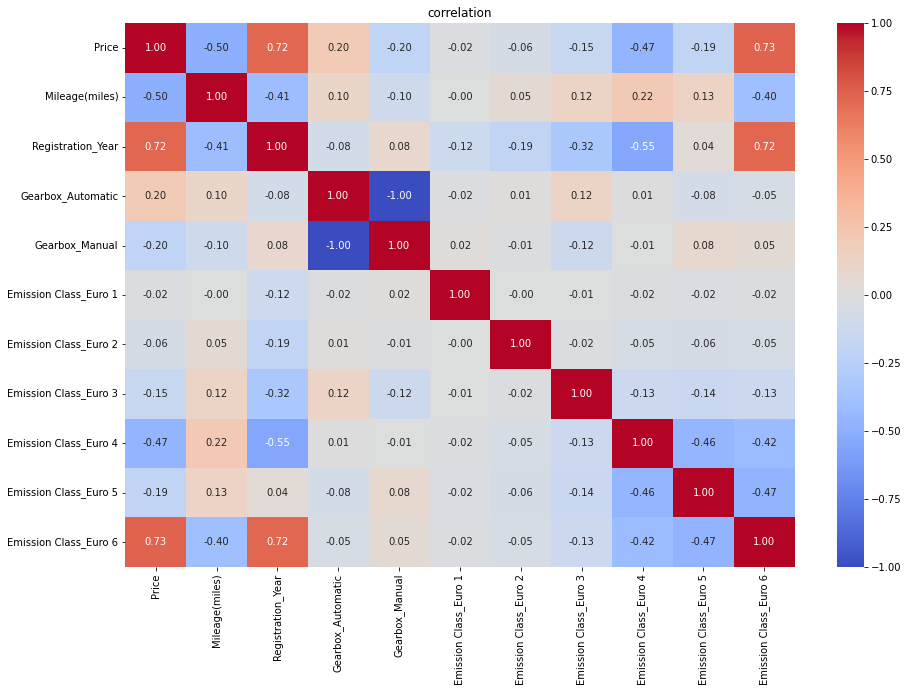

In [127]:
corr_matrix = scaled_df.corr()
#상관관계의 행렬을 생성한다. 
#시각화
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("correlation")
plt.show()


In [132]:
threshold = 0.6
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
# 상관관계를 쌍으로 펼치고, 0.9 이상치를 정렬한다. 
high_corr = corr_pairs[(corr_pairs < 1.0) & (corr_pairs >= 0.6)]
print(high_corr)

Emission Class_Euro 6  Price                    0.734429
Price                  Emission Class_Euro 6    0.734429
Registration_Year      Price                    0.722971
Price                  Registration_Year        0.722971
Emission Class_Euro 6  Registration_Year        0.722327
Registration_Year      Emission Class_Euro 6    0.722327
dtype: float64
